## DATA CLEANING USING PANDAS

In [62]:
import pandas as pd
import numpy as np

df = pd.read_csv("VideoGamesData.csv")

df = df.drop_duplicates()

df['Region'] = df['Region'].fillna('North')
df['Region'] = df['Region'].replace('Other' , 'North')


df['NA_Sales'] = df['NA_Sales'].replace("[$]", '' , regex = True)
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'], errors = 'coerce')

average_sales = df['NA_Sales'].mean()
df['NA_Sales'] = df['NA_Sales'].fillna(average_sales)

df = df.rename(columns={'NA_Sales' : 'National Sales' , 'NA_Profit' : 'National Profit' , 'Global_Sales' : 'Global Sales' , 'Global_Profit' : 'Global Profit'})
df['Country'] = df['Country'].replace('USA' , 'United States')
df['Country'] = df['Country'].str.title()

sales_threshold = df['National Sales'].quantile(0.95)


## DATA VISUALISATION

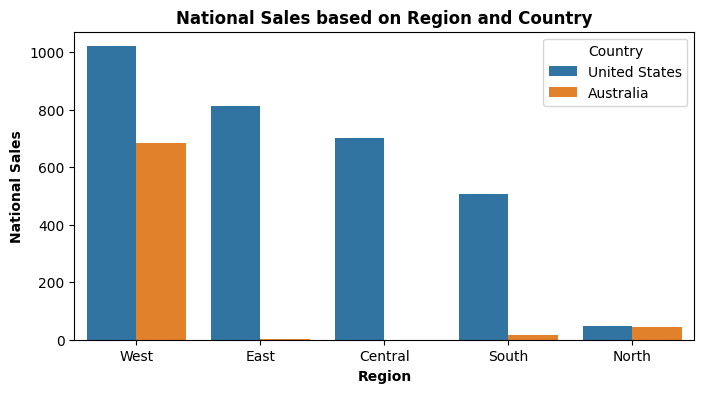

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

national_sales = df.groupby(['Region' , 'Country'])['National Sales'].sum().reset_index().sort_values(by = 'National Sales' , ascending = False)

plt.figure(figsize = (8,4))
sns.barplot(data = national_sales , x = 'Region' , y = 'National Sales' , hue = 'Country')
plt.title('National Sales based on Region and Country' , fontweight = 'bold')
plt.xlabel('Region' , fontweight = 'bold')
plt.ylabel('National Sales' , fontweight = 'bold')
plt.show()

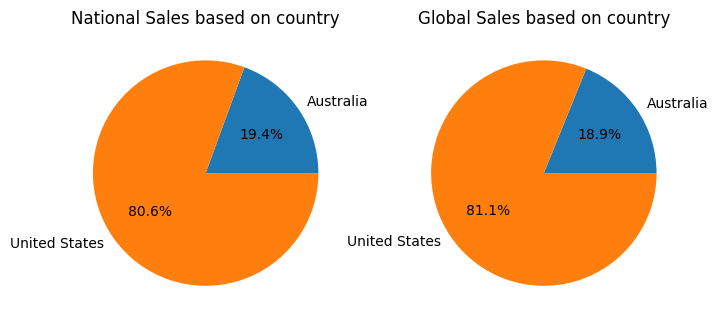

In [65]:
sales = df.groupby(['Country'])[['National Sales' , 'Global Sales']].sum().reset_index()

country = sales['Country']
nationalsales = sales['National Sales']
globalsales = sales['Global Sales']

fig , axis = plt.subplots(1,2 , figsize = (8,5))

axis[0].pie(nationalsales , labels = country , autopct = '%1.1f%%')
axis[0].set_title('National Sales based on country')
axis[1].pie(globalsales , labels = country , autopct = '%1.1f%%')
axis[1].set_title('Global Sales based on country')
plt.show()

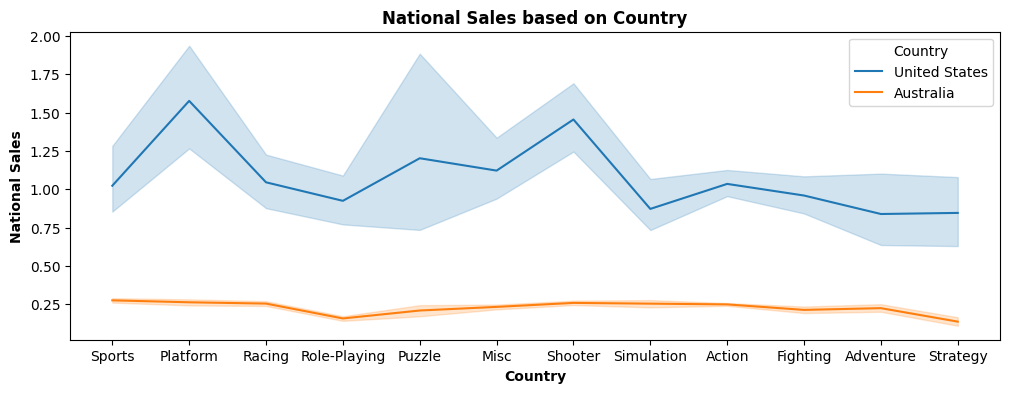

In [66]:
plt.figure(figsize = (12,4))
sns.lineplot(data = df , x = 'Genre' , y = 'National Sales' , hue = 'Country')
plt.title('National Sales based on Country' , fontweight = 'bold')
plt.xlabel('Country' , fontweight = 'bold')
plt.ylabel('National Sales' , fontweight = 'bold')
plt.show()